In [50]:
from QAOA_simulator import QAOA_run
import networkx as nx
import qokit.maxcut as mc
import numpy as np
from matplotlib import pyplot as plt

N = int(input('N ~ '))
p = int(input('p = '))
G = nx.erdos_renyi_graph(N, 0.5)  # Random graph w/ 0.5 edge probability
ising_model = mc.get_maxcut_terms(G)
init_gamma, init_beta = np.random.rand(2, p)
qaoa_calls_cobyla = []
qaoa_calls_bfgs = []
for n in range(p):
    cobyla_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "COBYLA")
    qaoa_calls_cobyla.append(cobyla_dict['num_QAOA_calls'])
    bfgs_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "BFGS")
    qaoa_calls_bfgs.append(bfgs_dict['num_QAOA_calls'])


QAOA_run(ising_model, N, p, init_gamma, init_beta, "COBYLA")



{'gamma': array([-0.19091962,  0.42316621,  1.21087783]),
 'beta': array([1.05096061, 1.79452939, 1.74611   ]),
 'state': array([-2.04455508e-06+6.11805393e-08j, -3.18552039e-01-2.55325802e-01j,
        -3.18552039e-01-2.55325802e-01j, -3.18552039e-01-2.55325802e-01j,
        -3.18552039e-01-2.55325802e-01j, -3.18552039e-01-2.55325802e-01j,
        -3.18552039e-01-2.55325802e-01j, -2.04455508e-06+6.11805393e-08j]),
 'expectation': 1.9999999999832658,
 'overlap': 8.367897062559466e-12,
 'runtime': 0.012050867080688477,
 'num_QAOA_calls': 89}

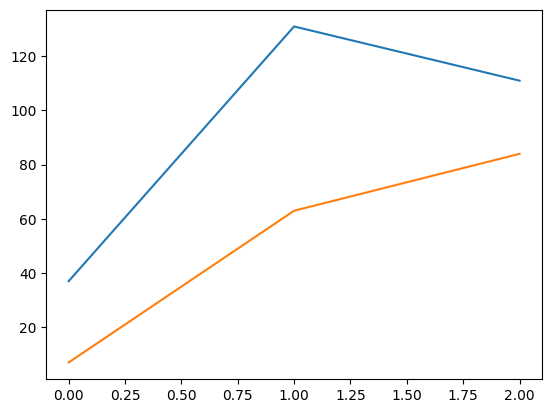

In [51]:
p_values = range(p)
#plt.scatter(p_values, qaoa_calls_bfgs)
plt.plot(p_values, qaoa_calls_cobyla)
plt.plot(p_values, qaoa_calls_bfgs)
plt.show()

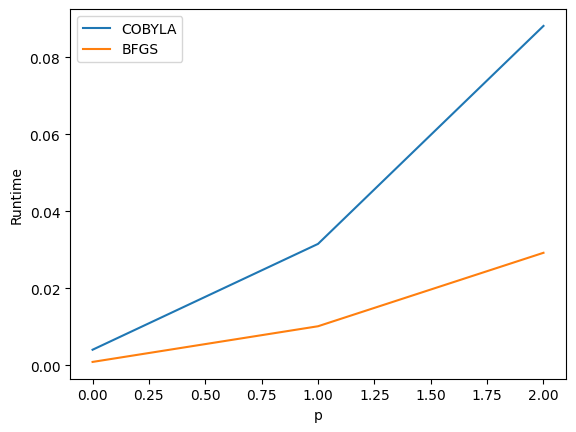

In [52]:
N = int(input('N = '))
p = int(input('p = '))
G = nx.erdos_renyi_graph(N, 0.5)  # Random graph w/ 0.5 edge probability
ising_model = mc.get_maxcut_terms(G)
init_gamma, init_beta = np.random.rand(2, p)
qaoa_calls_cobyla = []
qaoa_calls_bfgs = []
for n in range(p):
    cobyla_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "COBYLA")
    qaoa_calls_cobyla.append(cobyla_dict['runtime'])
    bfgs_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "BFGS")
    qaoa_calls_bfgs.append(bfgs_dict['runtime'])
#QAOA_run(ising_model, N, p, init_gamma, init_beta, "COBYLA")

p_values = range(p)
fig, ax = plt.subplots()
ax.plot(p_values, qaoa_calls_cobyla, label="COBYLA") 
ax.plot(p_values, qaoa_calls_bfgs, label="BFGS")
ax.set_xlabel("p") #x軸に名前を付ける
ax.set_ylabel("Runtime") #y軸に名前を付ける
ax.legend() #グラフに名前を付ける
plt.show() #表示

#Next exercise is to add labes for x-axis and y-axis.

In [55]:
N = int(input('N = '))
p_max = int(input('p = '))
ising_model = np.array([])  # Replace with your actual Ising model
'''
ising_model = np.array([]) は、空の NumPy 配列を作成しています。
これは、Ising モデルの項を格納するためのプレースホルダーとして使用されています。
実際には、Ising モデルの具体的な項（スピン相互作用と外部磁場の項など）を格納する
ための配列を定義する必要があります。
'''
optimizer_method1 = "COBYLA"
optimizer_method2 = "BFGS"
optimizer_options = {"rhobeg": 0.01 / N}
mixer = "x"

# Initialize gamma and beta with some values
p_values = []
for n in range(p_max):
    p_values.append(n)
runtimes1 = []
runtimes2 = []

for p in p_values:
    init_gamma = np.random.rand(p)
    init_beta = np.random.rand(p)
    runtimes1.append(QAOA_run(ising_model, N, n, init_gamma, init_beta, optimizer_method1, optimizer_options, mixer)["runtime"])
    runtimes2.append(QAOA_run(ising_model, N, n, init_gamma, init_beta, optimizer_method2)["runtime"])

# Plotting p vs runtime
plt.plot(p_values, runtimes1, label="COBYLA")
#plt.plot(p_values, runtimes2, label="BFGS")
plt.xlabel('p')
plt.ylabel('Runtime (seconds)')
plt.title('QAOA Runtime vs. p for '+optimizer_method1+" and "+optimizer_method2)
plt.legend()
plt.show()

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
N = int(input('N = '))
p = int(input('p = '))
J = 1.0  # Interaction term coefficient
h1 = 0.5  # External field on spin 1
h2 = 0.5  # External field on spin 2

# Define Ising model terms
ising_model = np.array([
    [J, 0, 1, 1],  # Interaction term between spin 1 and spin 2
    [h1, 0, 1, 0],  # External field on spin 1
    [h2, 0, 0, 1]   # External field on spin 2
])


